<a href="https://www.kaggle.com/code/saurabhsanjay/credit-fraud-detection?scriptVersionId=190848256" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_detection = pd.read_csv('/kaggle/input/fraudsynth-credit-fraud-detection-dataset/fraud_detection_dataset.csv',parse_dates=['timestamp'])

In [3]:
fraud_detection.set_index('timestamp', inplace=True)

In [4]:
fraud_detection.shape

(2000000, 9)

In [5]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000000 entries, 2023-12-15 02:48:24 to 2024-02-16 02:50:25
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       object 
 1   amount        float64
 2   location      object 
 3   device_type   object 
 4   is_fraud      int64  
 5   age           int64  
 6   income        float64
 7   debt          float64
 8   credit_score  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 152.6+ MB


In [6]:
fraud_detection.describe

<bound method NDFrame.describe of                                                   user_id   amount  \
timestamp                                                            
2023-12-15 02:48:24  3cbf0b8a-c799-4c0e-9782-89272ab8fa2b   998.99   
2023-10-30 11:08:37  3675ed98-6863-4bae-b089-6f0db2df006b   241.39   
2023-11-21 05:19:35  4be1043f-20ee-4ac5-a689-b25c6a1de50c   836.42   
2023-11-07 00:03:25  cad0b3c9-099f-479b-8043-6d5ecb4e1467   612.74   
2023-04-02 14:12:23  b6ebea7d-ba62-41d7-b042-3978a23fef8b   135.55   
...                                                   ...      ...   
2023-08-10 09:45:49  9a153a34-12d2-4eb1-a9fb-1eb2026ae0b6  3478.81   
2023-10-17 00:32:20  580c1fee-1abe-40bd-b166-fc1ecaf555d4  2337.90   
2023-05-19 13:17:44  41a22779-882a-4459-a00a-8b29521a8d38  2142.04   
2023-10-22 14:07:19  1e3ca371-9b58-4c01-99a2-770c4770716f  2452.60   
2024-02-16 02:50:25  bfe31322-ee70-4c9e-8aec-d58bdfebecde  4385.23   

                            location device_type  is_fr

In [7]:
fraud_detection.head()

,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score
timestamp,,,,,,,,,
2023-12-15 02:48:24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,998.99,Grantfurt,Mobile,0,56,42524.98,8394.05,655
2023-10-30 11:08:37,3675ed98-6863-4bae-b089-6f0db2df006b,241.39,Kimberlychester,Tablet,0,52,69884.04,28434.06,395
2023-11-21 05:19:35,4be1043f-20ee-4ac5-a689-b25c6a1de50c,836.42,Gutierrezville,Desktop,0,58,126953.62,39121.78,496
2023-11-07 00:03:25,cad0b3c9-099f-479b-8043-6d5ecb4e1467,612.74,Markside,Desktop,0,19,128650.70,39652.48,612
2023-04-02 14:12:23,b6ebea7d-ba62-41d7-b042-3978a23fef8b,135.55,Anthonyshire,Tablet,0,59,102020.39,7439.81,302


Text(0.5, 1.0, 'Fraud Detection Counts')

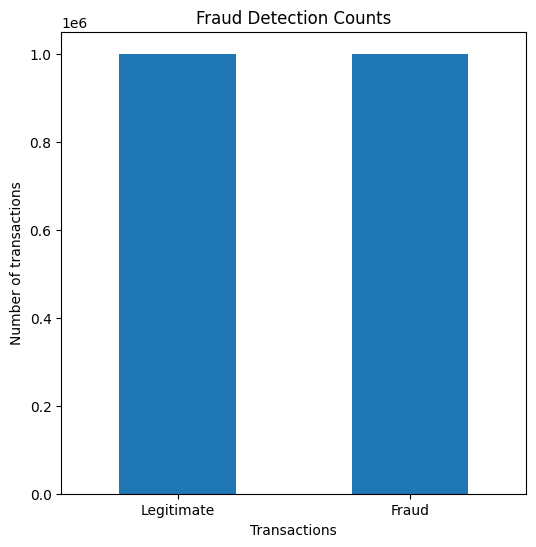

In [8]:
bar=fraud_detection['is_fraud'].value_counts().plot(kind='bar', figsize=(6,6))
plt.xlabel('Transactions')
new_labels = ['Legitimate', 'Fraud']  #0 is 'Legitimate' and 1 is 'Fraud'
bar.set_xticklabels(new_labels, rotation=0) 
plt.ylabel('Number of transactions')
plt.title('Fraud Detection Counts')

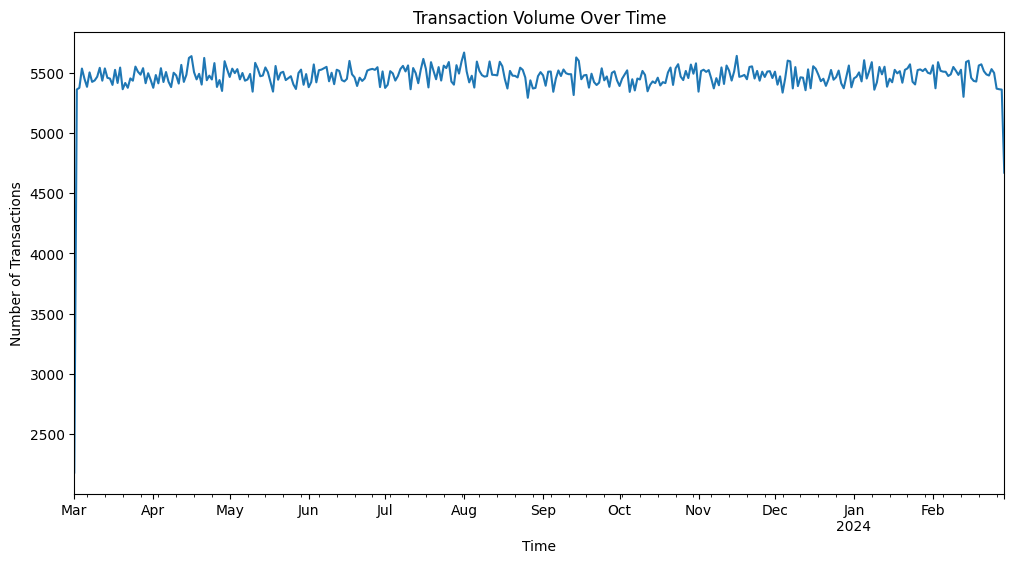

In [9]:
# Transaction volume over time
fraud_detection['amount'].resample('D').count().plot(figsize=(12, 6))
plt.title('Transaction Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()

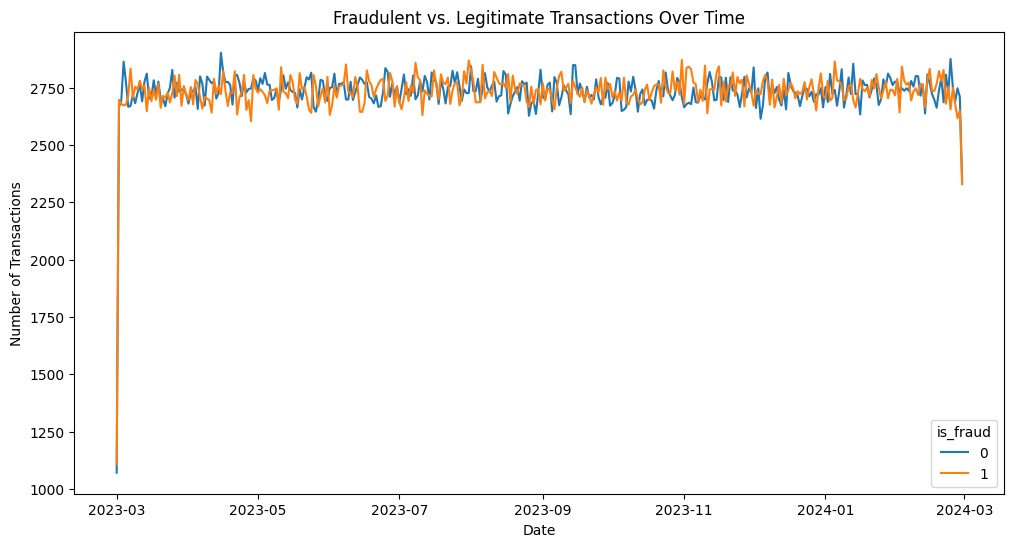

In [10]:
# Fraudulent vs. Legitimate Transactions Over Time
fraud_detection.groupby([fraud_detection.index.date, 'is_fraud']).size().unstack().plot(figsize=(12, 6))
plt.title('Fraudulent vs. Legitimate Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


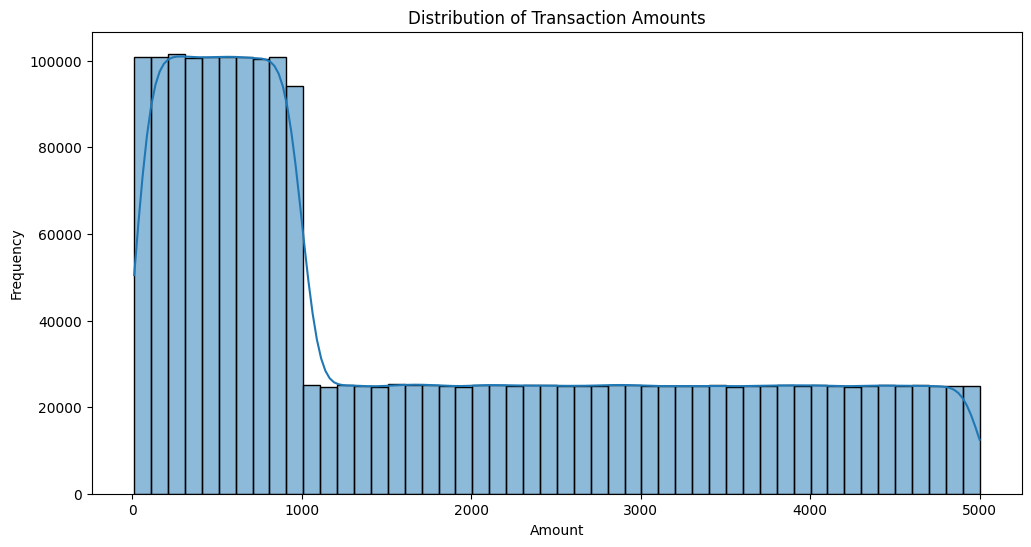

In [11]:
##Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(fraud_detection['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

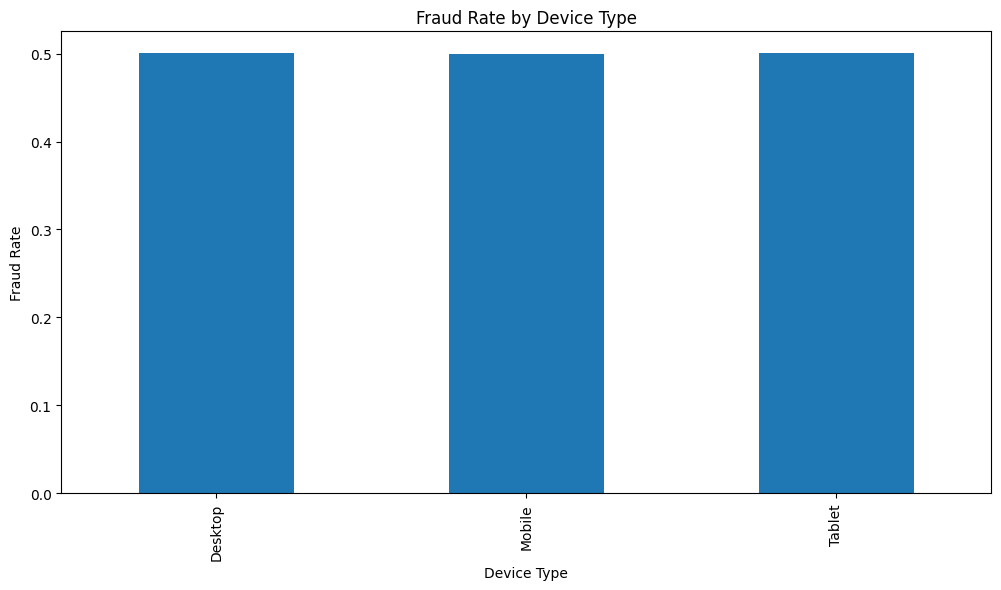

In [12]:
##Fraud detection analysis

# Fraud rate by device type
fraud_rate_device = fraud_detection.groupby('device_type')['is_fraud'].mean()
fraud_rate_device.plot(kind='bar', figsize=(12, 6))
plt.title('Fraud Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Fraud Rate')
plt.show()


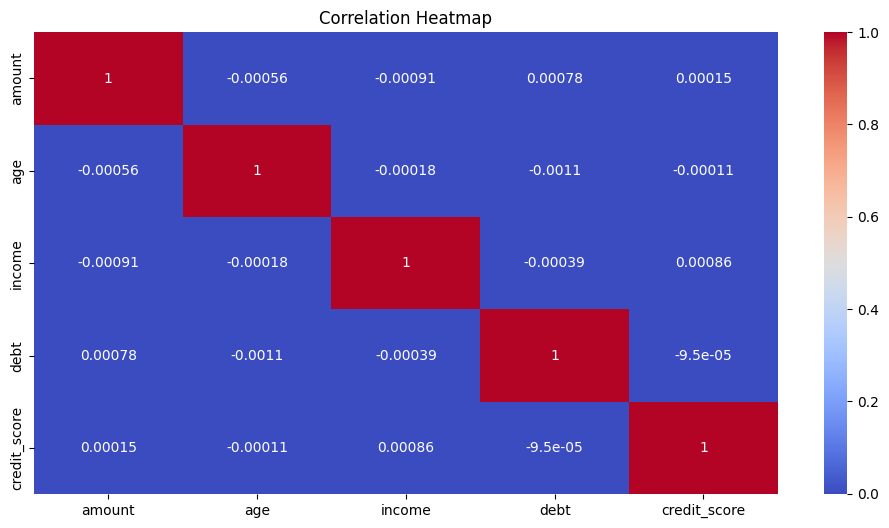

In [13]:
##Correlation Analysis

# Select only numeric columns
#numeric_cols = fraud_detection.select_dtypes(include=['float64', 'int64'])
specific_columns = ['amount','age','income','debt','credit_score']
# Filter the DataFrame to include only the specific columns
selected_data = fraud_detection[specific_columns]

# Calculate the correlation matrix
corr_matrix = selected_data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


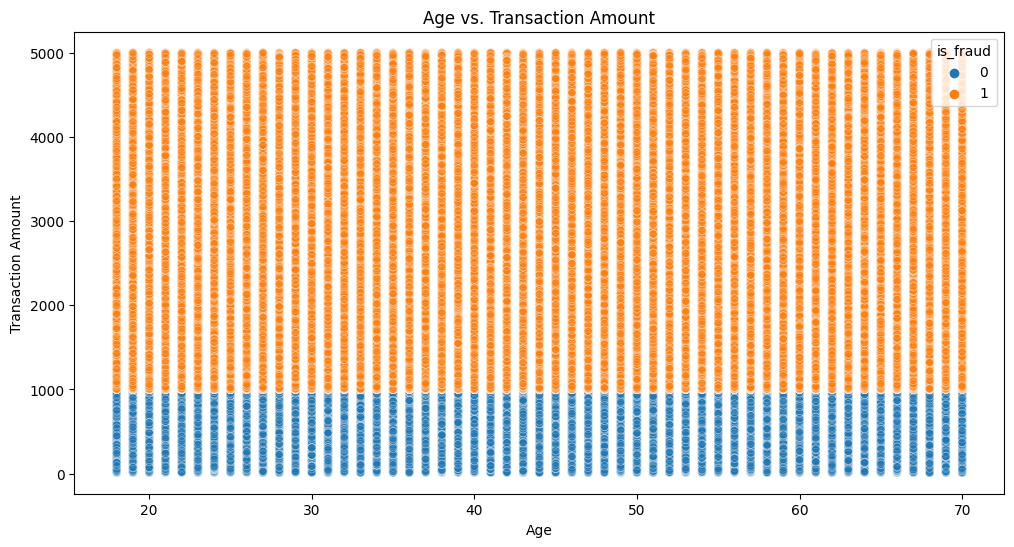

In [14]:
##Scatter Plots

plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='amount', hue='is_fraud', data=fraud_detection, alpha=0.5)
plt.title('Age vs. Transaction Amount')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()


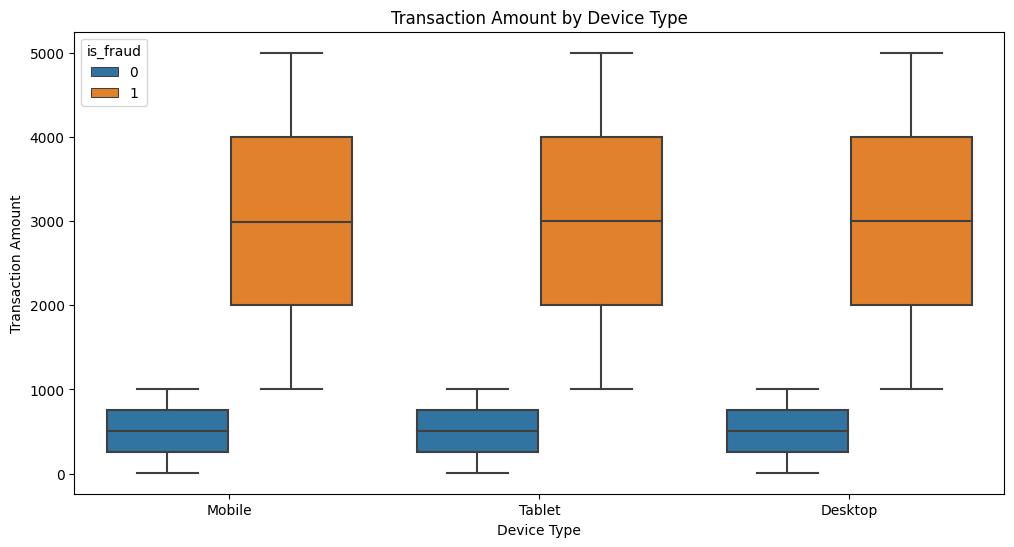

In [15]:
##Box Plots

plt.figure(figsize=(12, 6))
sns.boxplot(x='device_type', y='amount', hue='is_fraud', data=fraud_detection)
plt.title('Transaction Amount by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Transaction Amount')
plt.show()


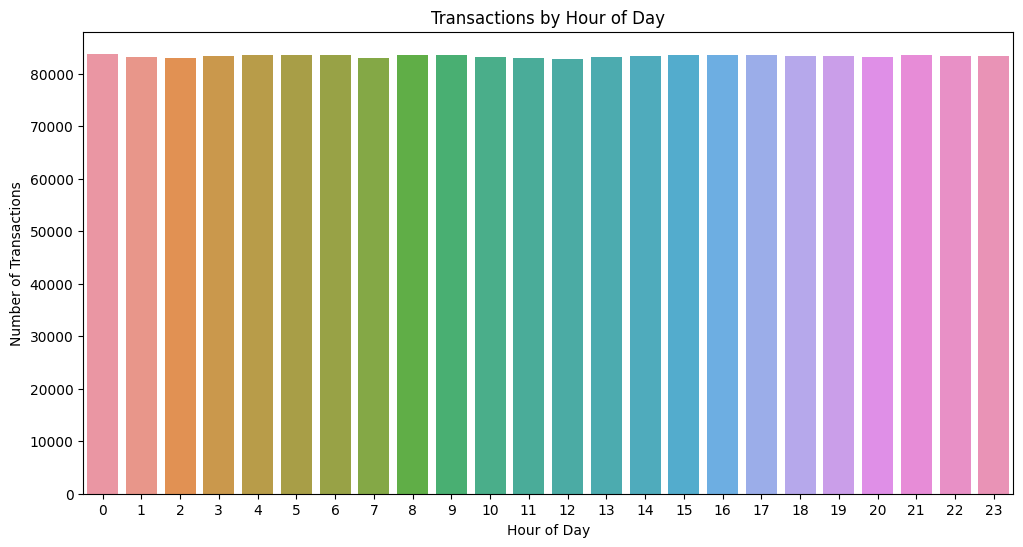

In [16]:
##Time of day Analysis

fraud_detection['hour'] = fraud_detection.index.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=fraud_detection)
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()


Data Pre-processing and selecting

In [17]:
fraud_detection.head()

,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score,hour
timestamp,,,,,,,,,,
2023-12-15 02:48:24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,998.99,Grantfurt,Mobile,0,56,42524.98,8394.05,655,2
2023-10-30 11:08:37,3675ed98-6863-4bae-b089-6f0db2df006b,241.39,Kimberlychester,Tablet,0,52,69884.04,28434.06,395,11
2023-11-21 05:19:35,4be1043f-20ee-4ac5-a689-b25c6a1de50c,836.42,Gutierrezville,Desktop,0,58,126953.62,39121.78,496,5
2023-11-07 00:03:25,cad0b3c9-099f-479b-8043-6d5ecb4e1467,612.74,Markside,Desktop,0,19,128650.70,39652.48,612,0
2023-04-02 14:12:23,b6ebea7d-ba62-41d7-b042-3978a23fef8b,135.55,Anthonyshire,Tablet,0,59,102020.39,7439.81,302,14


In [18]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000000 entries, 2023-12-15 02:48:24 to 2024-02-16 02:50:25
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       object 
 1   amount        float64
 2   location      object 
 3   device_type   object 
 4   is_fraud      int64  
 5   age           int64  
 6   income        float64
 7   debt          float64
 8   credit_score  int64  
 9   hour          int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 160.2+ MB


***Predictive Model***

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample 0.025% of the dataset for exploration
fraud_detection_subset = fraud_detection.sample(frac=0.025, random_state=42)

# Split the data into features and target
X = fraud_detection_subset[['amount','location','device_type','age','income','debt','credit_score']]
y = fraud_detection_subset[['is_fraud']]

# One-Hot Encode the categorical features using pd.get_dummies
X_encoded = pd.get_dummies(X, columns=['location', 'device_type'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=0)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increasing max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.96168
